In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2, time
import numpy as np

images_names = ['3.jpg']

images = []

for img in images_names:
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    images.append(image)

images = np.array(images)

In [207]:
def get_black_pixel_indices(img):
    rows_remove = []
    cols_remove = []

    for j, counter in enumerate(range(img.shape[0])):
        row = img[counter]
        # shift column dim to first dim, row dim to second dim
        # acts like a 90 degree counterclock-wise rotation of image
        col = img.transpose(1, 0, 2)[counter]

        row_black_pixel_count = 0
        col_black_pixel_count = 0
        for selector in range(img.shape[1]):
            row_pixel = row[selector]
            col_pixel = col[selector]
            
            if np.average(row_pixel) < 40:
                row_black_pixel_count += 1
            if np.average(col_pixel) < 40:
                col_black_pixel_count += 1
        
        if row_black_pixel_count > len(row)/2:
            rows_remove.append(j)
        if col_black_pixel_count > len(col)/2:
            cols_remove.append(j)

    return rows_remove, cols_remove

def remove_obstructing_indices(rows_remove, cols_remove):
    for i, value in enumerate(rows_remove):
        if 200 <= value <= 800:
            del rows_remove[i]
    for i, value in enumerate(cols_remove):
        if 200 <= value <= 800:
            del cols_remove[i]

    return rows_remove, cols_remove

def remove_black_pixels(img, rows_remove, cols_remove):
    img = np.delete(img, rows_remove, axis=0)
    img = np.delete(img, cols_remove, axis=1)
    
    return img

def adjust_aspect_ratio(img, rows_remove, cols_remove):
    col_row_diff = len(cols_remove) - len(rows_remove)
    row_col_diff = len(rows_remove) - len(cols_remove)
    
    if col_row_diff > 0:
        slice_size = int(col_row_diff/2)
        
        img = img[:-slice_size]
        img = img[slice_size:]
        
        if img.shape[0] != img.shape[1]:
            img = img[:-1]
            
    elif row_col_diff > 0:
        slice_size = int(row_col_diff/2)
        
        img = img[:,:-slice_size,:]
        img = img[:,slice_size:,:]
        
        if img.shape[0] != img.shape[1]:
            img = img[:,:-1,:]
    
    if img.shape[0] == img.shape[1]:
        return img, True
    else:
        return img, False

new_images = []
adjusted_images = []

start = time.time()
for i, img in enumerate(images):
    rows_remove, cols_remove = get_black_pixel_indices(img)
    rows_remove, cols_remove = remove_obstructing_indices(rows_remove, cols_remove)
    
    new_img = remove_black_pixels(img, rows_remove, cols_remove)
    new_images.append(new_img)
    
    adj_img, shape_match = adjust_aspect_ratio(new_img, rows_remove, cols_remove)
    if shape_match:
        adjusted_images.append(adj_img)

    print('image number {0}, time spent {1:2f}s'.format(i+1, time.time() - start))

image number 1, time spent 17.156892s


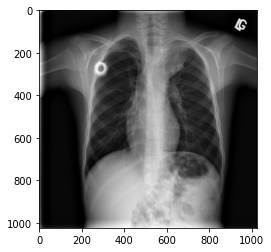

In [204]:
plt.imshow(images[0])
plt.show()

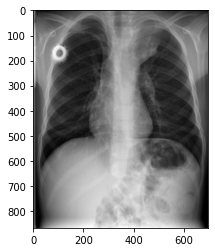

In [205]:
plt.imshow(new_images[0])
plt.show()

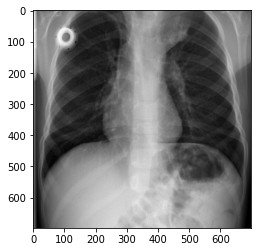

In [206]:
plt.imshow(adjusted_images[0])
plt.show()